# Parkinson's Disease Progression Prediction
### Project - SI 618: Data Manipulation and Analysis

Authors
1. Nowrin Mohamed - nowrin@umich.edu
2. Prithvijit Dasgupta - prithvid@umich.edu
3. Sachin Salim - sachinks@umich.edu

Kaggle link: https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction/overview

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
supplemental_clinical_data = pd.read_csv('data/supplemental_clinical_data.csv')
peptides_data = pd.read_csv('data/train_peptides.csv') 
clinical_data = pd.read_csv('data/train_clinical_data.csv') 
proteins_data = pd.read_csv('data/train_proteins.csv')

## Descriptive Analysis

### Proteins (Sachin)

In [23]:
display(proteins_data.head(2))
display(proteins_data.info())

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


None

In [61]:
print(f'records: {len(proteins_data)}')

unique_visits = len(proteins_data['visit_id'].unique())
print(f'Unique visits: {unique_visits}')

unique_proteins = len(proteins_data['UniProt'].unique())
print(f'Unique proteins: {unique_proteins}')

unique_patients = len(proteins_data['patient_id'].unique())
print(f'Unique patients: {unique_patients}')

visit_min = proteins_data['visit_month'].min()
visit_max = proteins_data['visit_month'].max()
print(f'Visit month range: ({visit_min}, {visit_max})')

records: 232741
Unique visits: 1113
Unique proteins: 227
Unique patients: 248
Visit month range: (0, 108)


In [52]:
protein_npx_mean = proteins_data.pivot_table(
    index='UniProt',
    values='NPX',
    aggfunc=np.mean)
protein_npx_mean


,NPX
UniProt,
O00391,11641.264435
O00533,511164.883903
O00584,26505.529157
O14498,27305.934884
O14773,17688.295406
...,...
Q9UHG2,229862.538275
Q9UKV8,69924.939658
Q9UNU6,19742.853219


In [28]:
proteins_data['UniProt'].value_counts().head(10)

P01024    1113
P05090    1113
P01011    1113
P01023    1113
Q92520    1113
P01042    1113
P23142    1113
P02790    1113
Q9UHG2    1113
P01834    1113
Name: UniProt, dtype: int64

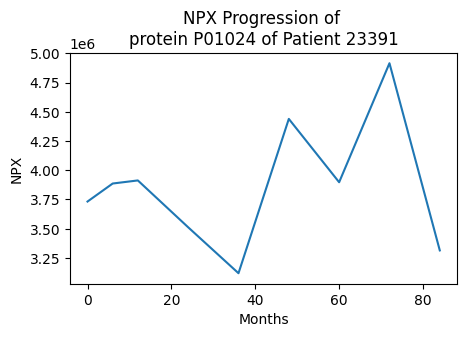

In [51]:
npx_progression = proteins_data.query('patient_id == 23391 & UniProt == "P01024"')
plt.figure(figsize=(5,3))
plt.plot(npx_progression['visit_month'], npx_progression['NPX'])
plt.xlabel("Months")
plt.ylabel("NPX")
plt.title("NPX Progression of \nprotein P01024 of Patient 23391")
plt.show()

In [11]:
proteins_data['NPX'].describe()

count    2.327410e+05
mean     2.712077e+06
std      2.224155e+07
min      8.460820e+01
25%      2.946440e+04
50%      1.135560e+05
75%      5.638940e+05
max      6.138510e+08
Name: NPX, dtype: float64

In [12]:
print(np.percentile(proteins_data['NPX'], 25))
print(np.percentile(proteins_data['NPX'], 50))
print(np.percentile(proteins_data['NPX'], 99))

29464.4
113556.0
35067360.000000075


<AxesSubplot: >

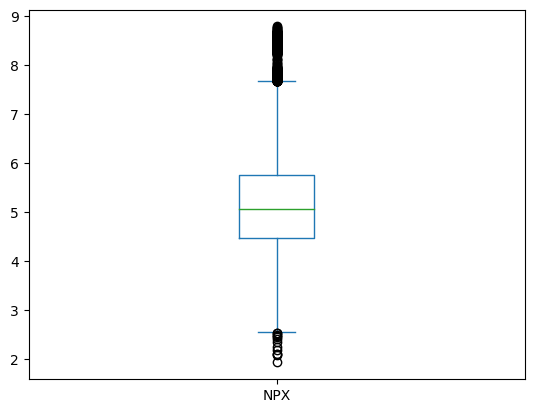

In [13]:
np.log10(proteins_data['NPX']).plot.box()

### Peptides (Nowrin)

In [14]:
print(f'records: {len(peptides_data)}')
peptides_data.head()

records: 981834


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [15]:
unique_peptides = len(peptides_data['Peptide'].unique())
print(f'{unique_peptides} unique peptides')

968 unique peptides


### Clinical data (Prithvi)

In [16]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2615 non-null   int64  
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 163.6+ KB


In [17]:
print(f'records: {len(clinical_data)}')
clinical_data.head()

records: 2615


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,6,NaN,NaN
1,55_3,55,3,10.0,7.0,19,NaN,NaN
2,55_6,55,6,8.0,10.0,58,NaN,NaN
3,55_9,55,9,8.0,9.0,17,0.0,On
4,55_12,55,12,10.0,10.0,2,0.0,On


In [18]:
clinical_data['upd23b_clinical_state_on_medication'].value_counts(dropna = False)

NaN    1327
On      775
Off     513
Name: upd23b_clinical_state_on_medication, dtype: int64

In [19]:
clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.000000,2615.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.742442,20.213384,1.861763
std,18535.758700,25.199053,5.525678,6.321699,20.760290,3.022112
min,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.000000,4.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.000000,9.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.000000,21.000000,3.000000
max,65043.000000,108.000000,33.000000,40.000000,58.000000,20.000000


In [20]:
clinical_data['updrs_cum'] = clinical_data['updrs_1'] + clinical_data['updrs_2'] + clinical_data['updrs_3'] + clinical_data['updrs_4']

<AxesSubplot: ylabel='Frequency'>

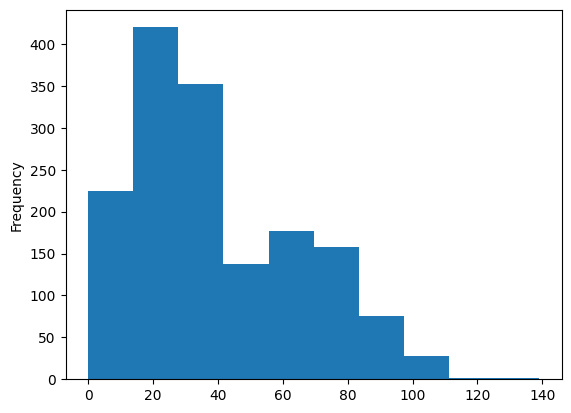

In [21]:
clinical_data['updrs_cum'].plot.hist()